In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import pymongo
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pymongo import MongoClient
import pandas as pd
import pickle

In [2]:
def get_database():
    
    CONNECTION_STRING = "mongodb+srv://admin:<password>@<cluster>"
    client = MongoClient(CONNECTION_STRING)
    return client['oct30']

def load_df_from_mongo(collectionName):
    mongo_db = get_database()
    collection = mongo_db[collectionName] 
    cursor = collection.find({})
    df =  pd.DataFrame(list(cursor))
    del df['_id']
    return df

In [3]:
data_model = load_df_from_mongo('regression')
data = data_model.copy()
data = data.sample(n=15000)

C:\Users\ymurugan\Anaconda3\envs\reserve\lib\site-packages\pymongo\common.py:813: UserWarning: The value of retrywrites must be 'true' or 'false'
  warnings.warn(str(exc))


In [4]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,TimeInMinute,Sub_metering
116887,2.618,0.000,239.47,454.0,0.0
54857,0.310,0.104,246.18,291.0,2.0
66474,1.392,0.582,239.84,991.0,18.0
120582,0.474,0.216,245.26,1371.0,2.0
38111,1.510,0.000,238.16,551.0,18.0


### Test/Train split and standardization

In [5]:
y = data['Sub_metering']
X = data.drop(columns=['Sub_metering'])

In [6]:
print(y.shape)
print(X.shape)

(15000,)
(15000, 4)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=10)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10050, 4)
(4950, 4)
(10050,)
(4950,)


In [9]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
linearRegression=LinearRegression()
ridgeRegression=Ridge(alpha=1.0)
lassoRegression=Lasso(alpha=0.1)
elaticnetRegression=ElasticNet(random_state=0)
svr=SVR(C=1.0, epsilon=0.2)

In [11]:
linearRegression.fit(X_train,y_train)

LinearRegression()

In [12]:
ridgeRegression.fit(X_train,y_train)

Ridge()

In [13]:
lassoRegression.fit(X_train,y_train)

Lasso(alpha=0.1)

In [14]:
elaticnetRegression.fit(X_train,y_train)

ElasticNet(random_state=0)

In [15]:
svr.fit(X_train,y_train)

SVR(epsilon=0.2)

In [17]:
print("Coeffiency")
print("Linear regression",linearRegression.coef_)
print("Ridge Regression",ridgeRegression.coef_)
print("Lasso Regression",lassoRegression.coef_)
print("Elaticnet Regression",elaticnetRegression.coef_)
# print("SV Regression",svr.coef_)

Coeffiency
Linear regression [11.12191824 -0.43143259 -0.14221631 -1.07642016]
Ridge Regression [11.1204434  -0.43113213 -0.14268634 -1.07602287]
Lasso Regression [10.98705747 -0.3060223  -0.05931155 -0.94152677]
Elaticnet Regression [ 6.64263749  0.         -0.79229976 -0.        ]


In [18]:
print("Intercept")
print(linearRegression.intercept_)
print(ridgeRegression.intercept_)
print(lassoRegression.intercept_)
print(elaticnetRegression.intercept_)
print(svr.intercept_)

Intercept
8.551343283582092
8.551343283582092
8.551343283582092
8.551343283582096
[16.74630261]


In [19]:
linear_reg_pred=linearRegression.predict(X_test)
ridge_reg_pred=ridgeRegression.predict(X_test)
lasso_reg_pred=lassoRegression.predict(X_test)
elastic_reg_pred=elaticnetRegression.predict(X_test)
svr_pred=svr.predict(X_test)

Text(0, 0.5, 'Test Predicted Data - linear regression')

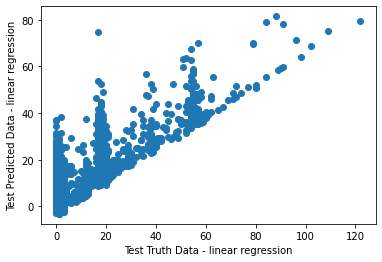

In [22]:
plt.scatter(y_test,linear_reg_pred)
plt.xlabel("Test Truth Data - linear regression")
plt.ylabel("Test Predicted Data - linear regression")

Text(0, 0.5, 'Test Predicted Data - ridge regression')

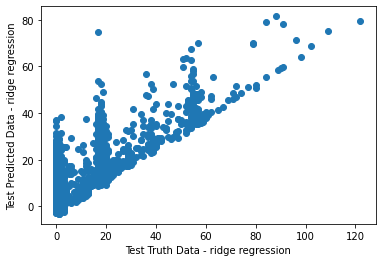

In [23]:
plt.scatter(y_test,ridge_reg_pred)
plt.xlabel("Test Truth Data - ridge regression")
plt.ylabel("Test Predicted Data - ridge regression")

Text(0, 0.5, 'Test Predicted Data - lasso regression')

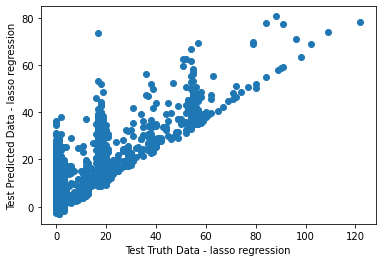

In [24]:
plt.scatter(y_test,lasso_reg_pred)
plt.xlabel("Test Truth Data - lasso regression")
plt.ylabel("Test Predicted Data - lasso regression")

Text(0, 0.5, 'Test Predicted Data - Elastic net regression')

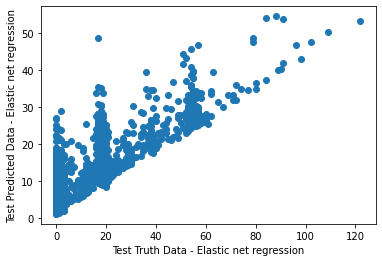

In [25]:
plt.scatter(y_test,elastic_reg_pred)
plt.xlabel("Test Truth Data - Elastic net regression")
plt.ylabel("Test Predicted Data - Elastic net regression")

Text(0, 0.5, 'Test Predicted Data - support vector regression')

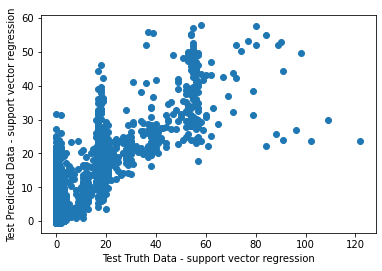

In [26]:
plt.scatter(y_test,svr_pred)
plt.xlabel("Test Truth Data - support vector regression")
plt.ylabel("Test Predicted Data - support vector regression")

In [28]:
## residuals
linear_residuals=y_test-linear_reg_pred
ridge_residuals=y_test-ridge_reg_pred
lasso_residuals=y_test-lasso_reg_pred
elaticnet_residuals=y_test-elastic_reg_pred
sv_residuals=y_test-svr_pred

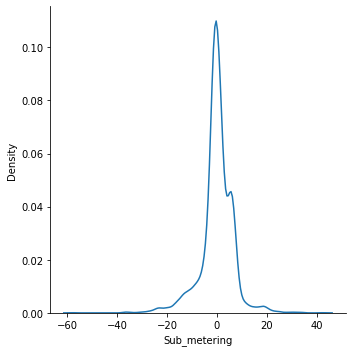

In [29]:
sns.displot(linear_residuals,kind="kde")

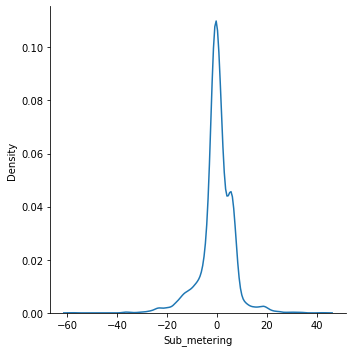

In [30]:
sns.displot(ridge_residuals,kind="kde")

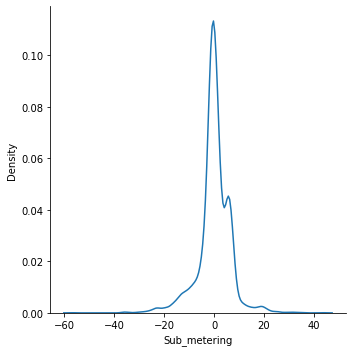

In [31]:
sns.displot(lasso_residuals,kind="kde")

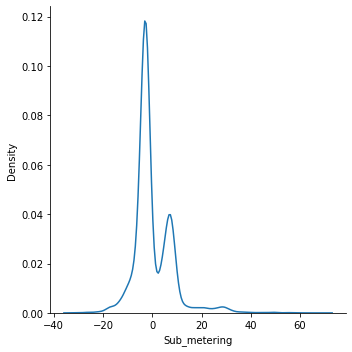

In [32]:
sns.displot(elaticnet_residuals,kind="kde")

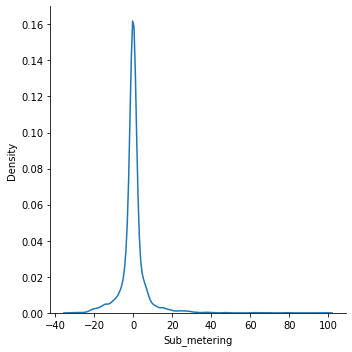

In [33]:
sns.displot(sv_residuals,kind="kde")

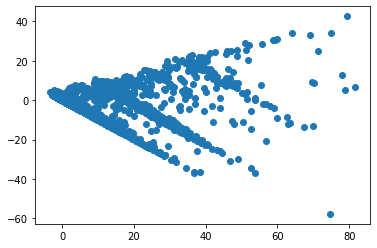

In [34]:
plt.scatter(linear_reg_pred,linear_residuals)

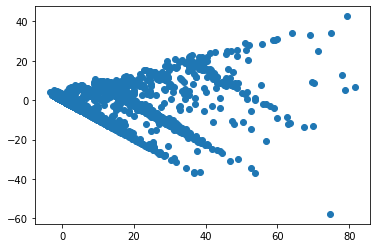

In [35]:
plt.scatter(ridge_reg_pred,ridge_residuals)

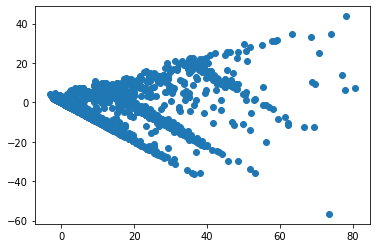

In [36]:
plt.scatter(lasso_reg_pred,lasso_residuals)

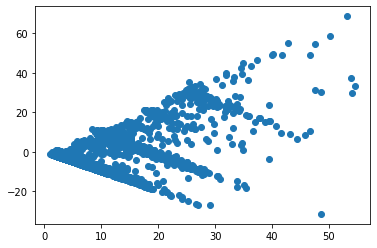

In [37]:
plt.scatter(elastic_reg_pred,elaticnet_residuals)

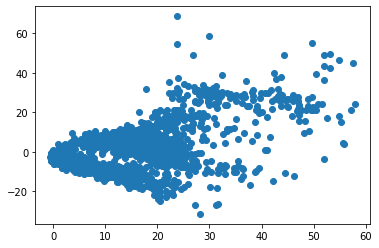

In [38]:
plt.scatter(svr_pred,elaticnet_residuals)

In [41]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("MSE - linear regression =>",mean_squared_error(y_test,linear_reg_pred))
print("MAE - linear regression =>",mean_absolute_error(y_test,linear_reg_pred))
print("RMSE - linear regression =>",np.sqrt(mean_squared_error(y_test,linear_reg_pred)))

print("MSE - ridge regression =>",mean_squared_error(y_test,ridge_reg_pred))
print("MAE - ridge regression =>",mean_absolute_error(y_test,ridge_reg_pred))
print("RMSE - ridge regression =>",np.sqrt(mean_squared_error(y_test,ridge_reg_pred)))

print("MSE - lasso regression =>",mean_squared_error(y_test,lasso_reg_pred))
print("MAE - lasso regression =>",mean_absolute_error(y_test,lasso_reg_pred))
print("RMSE - lasso regression =>",np.sqrt(mean_squared_error(y_test,lasso_reg_pred)))

print("MSE - elaticnet regression =>",mean_squared_error(y_test,elastic_reg_pred))
print("MAE - elaticnet regression =>",mean_absolute_error(y_test,elastic_reg_pred))
print("RMSE - elaticnet regression =>",np.sqrt(mean_squared_error(y_test,elastic_reg_pred)))

print("MSE - sv regression =>",mean_squared_error(y_test,svr_pred))
print("MAE - sv regression =>",mean_absolute_error(y_test,svr_pred))
print("RMSE - sv regression =>",np.sqrt(mean_squared_error(y_test,svr_pred)))

MSE - linear regression => 44.0312603804588
MAE - linear regression => 4.318794746868372
RMSE - linear regression => 6.635605502172262
MSE - ridge regression => 44.03190828477409
MAE - ridge regression => 4.3187850124977665
RMSE - ridge regression => 6.6356543222785564
MSE - lasso regression => 44.1075332306795
MAE - lasso regression => 4.3048251418961705
RMSE - lasso regression => 6.64135025658785
MSE - elaticnet regression => 63.23681532596341
MAE - elaticnet regression => 5.643383769856151
RMSE - elaticnet regression => 7.952157903736785
MSE - sv regression => 45.9738746808197
MAE - sv regression => 3.4474910650167017
RMSE - sv regression => 6.78040372550335


In [42]:
from sklearn.metrics import r2_score
linear_reg_score = r2_score(y_test,linear_reg_pred)
ridge_reg_score = r2_score(y_test,ridge_reg_pred)
lasso_reg_score = r2_score(y_test,lasso_reg_pred)
elasticnet_reg_score = r2_score(y_test,elastic_reg_pred)
sv_reg_score = r2_score(y_test,svr_pred)

print('r^2 and adjusted r^2 - linear regression =>',linear_reg_score,1 - (1-linear_reg_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('r^2 and adjusted r^2 - ridge regression =>',ridge_reg_score,1 - (1-ridge_reg_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('r^2 and adjusted r^2 - lasso regression =>',lasso_reg_score,1 - (1-lasso_reg_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('r^2 and adjusted r^2 - elaticnet regression =>',elasticnet_reg_score,1 - (1-elasticnet_reg_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('r^2 and adjusted r^2 - sv regression =>',sv_reg_score,1 - (1-sv_reg_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

r^2 and adjusted r^2 - linear regression => 0.7433801549678097 0.7431725757200587
r^2 and adjusted r^2 - ridge regression => 0.7433763788981822 0.7431687965959766
r^2 and adjusted r^2 - lasso regression => 0.7429356269930327 0.7427276881675469
r^2 and adjusted r^2 - elaticnet regression => 0.631447712169513 0.631149591006455
r^2 and adjusted r^2 - sv regression => 0.7320583491323998 0.7318416116999487


### Picking the model for future use

In [43]:
pickle.dump(linearRegression, open('linearRegression.pkl', 'wb'))
pickle.dump(ridgeRegression, open('ridgeRegression.pkl', 'wb'))
pickle.dump(linearRegression, open('lassoRegression.pkl', 'wb'))
pickle.dump(ridgeRegression, open('elaticnetRegression.pkl', 'wb'))
pickle.dump(linearRegression, open('svr.pkl', 'wb'))

NameError: name 'pickle' is not defined